In [1]:
%matplotlib inline

# Basis Vectors and Orthogonality

If the idea of a basis is one of the foundations of linear algebra, then the specialization to an orthogonal basis is not far behind. We need a basis to convert geometric constructions into algebraic calculations, and we need an orthogonal basis to make those calculations simple. There is even a further specialization, which makes the basis just about optimal: The vectors should have length one. That can be achieved, but to do it we have to know

1. the length of a vector
2. the test for perpendicular vectors
3. how to create perpendicular vectors from linearly independent vectors.

Gilbert Strang Linear Algebra

We have previously addressed two of three features

The length of a vector is the norm.
The test for perpendicularity is done with the inner product.

## Example of basis vectors

The idea of basis vectors for a vector space is the following: Can linear combinations of a set of vectors be used to reach every point in the vector space?

To explore this, we will consider the two-dimension ($\Re^2$) space of the x-y plane. A pair of basis vectors for this space is 

\begin{eqnarray}
e_1 = \begin{bmatrix}
\begin{array}{r{\quad}1}
1 \\ 0
\end{array}
\end{bmatrix}, e_2 = \begin{bmatrix}
\begin{array}{r{\quad}1}
0 \\ 1
\end{array}
\end{bmatrix}
\end{eqnarray}

These vectors are drawn below. These vectors happen to be **unit vectors** (norm/length of 1) and orthogonal ($\mathbf{e_2}^T \mathbf{e_1}=0$).

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from myla.plotting import *

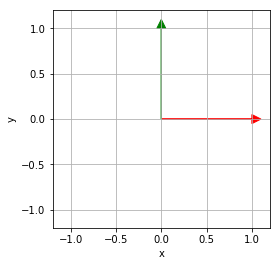

In [4]:
draw_vectors((1,0, "red"),(0,1, "green"))

You can get to anywhere in the plane by some combination of $\mathbf{e_1}$ and $\mathbf{e_2}$, something we probably explored in elementary school. 

For example, I an get to the point $(15,-3)$ with 

\begin{equation}
15\times \mathbf{e_1} + -3 \times \mathbf{e_2}
\end{equation}

Our basis functions do not need to be unit vectors. For example, we could have the following basis vectors:

\begin{eqnarray}
e_3 = \begin{bmatrix}
\begin{array}{r{\quad}1}
7 \\ 0
\end{array}
\end{bmatrix}, e_4 = \begin{bmatrix}
\begin{array}{r{\quad}1}
0 \\ -2
\end{array}
\end{bmatrix}
\end{eqnarray}

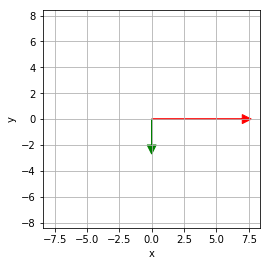

In [5]:
draw_vectors((7,0, "red"),(0,-2, "green"))

Our arithmetic might get a little more complex, but we can still use $\mathbf{e_3}$ and $\mathbf{e_4}$ to get anywhere in the plane. For example to get to get our point $(15,-3)$ we would do the following

\begin{equation}
\frac{15}{7}\times \mathbf{e_1} + \frac{3}{2} \times \mathbf{e_2}
\end{equation}

In [6]:
isinstance([1,3],(np.ndarray, list, tuple))

True

In [7]:
e_3 = np.array([[7],[0]])
e_4 = np.array([[0],[-2]])


#### Some utility functions

In [8]:
def v2l(v):
    return [vv[0] for vv in v]
a2l = lambda x: x.tolist()
m2a = lambda m: np.array(m)[0]


In [9]:

draw_vectors((f2(e_3), "red"),
             (f2(e_4), "red"))

NameError: name 'f2' is not defined

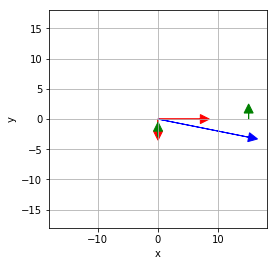

In [10]:

draw_vectors((v2l(e_3), "red"),
             (v2l(e_4), "red"), 
             (v2l((15/7)*e_3),(0,1,0,0.5), "g"), 
             (v2l((3/2)*e_4), (0,1,0,0.5), "g"),
             (v2l((15/7)*e_3 + (3/2)*e_4),"blue"))

In [11]:
v3 = np.matrix([1.0,0.2])
v3 = v3/la.norm(v3)
v3
def unit_vectors(*v):
    vs = [np.array(vv)/la.norm(vv) for vv in v]
    return vs

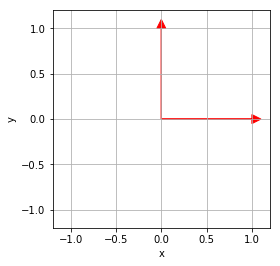

In [12]:
draw_vectors((1,0, "red"),(0,1, "red"))

In [13]:
(*(zip(["red","green"],unit_vectors((1.01,0.0),(1.01,0.2)))),1)

(('red', array([1., 0.])), ('green', array([0.98095245, 0.19424801])), 1)

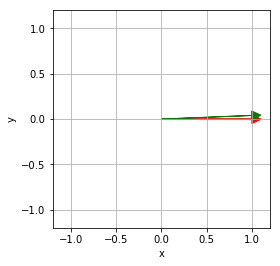

In [14]:
draw_vectors(*(zip(map(a2l,unit_vectors((5,0.0),(5.0,0.2))),("red","green"))))

In [15]:
unit_vectors((1.01,0.0),(1.01,0.02))

[array([1., 0.]), array([0.999804 , 0.0197981])]

In [16]:
(*zip(map(a2l, unit_vectors((5,0.0),(5.0,0.2))),("red","green")),1)

(([1.0, 0.0], 'red'), ([0.9992009587217894, 0.03996803834887158], 'green'), 1)

## Gram-Schmidt Orthogonalization

Orthonormal matrices are nice. They...

Gram-Schmidt is a simple algorithm for taking a non-orthonormal matrix ($A$) consisting of linear independent columns and creates an orthonormal version of the matrix ($Q$). The algorithm can be described as follows. Assume that we have an Array $A$ consisting of columns $\mathbf{a_i}$.

\begin{equation}
A=\begin{bmatrix}
\begin{array}{cccc{\qquad}1}
\mathbf{a_1} & \mathbf{a_2} & \cdots & \mathbf{a_n}
\end{array}
\end{bmatrix}
\end{equation}


1. Pick a column (vector); anyone will do so we might as well pick $\mathbf{a_{i=0}}$.
1. Create a unit vector version of $\mathbf{a_i}$ ($\mathbf{q_i}$) by dividing $\mathbf{a_i}$ by its norm ($\frac{\mathbf{a_i}}{||\mathbf{a_i}||}$)
2. Subtract $\mathbf{q_i}$ from all subsequent vectors $\mathbf{q_{j>i}}$
\begin{equation}
\mathbf{a_{j_i}^\prime} = \mathbf{a_j} - (\mathbf{q_i}^T \mathbf{a_j}) \mathbf{q_i}
\end{equation}
3. Increment $i$ and repeat.



Thus for any column $j$ we subtract the projection of all columns $i$ ($i < j$), the final process can be expressed as

\begin{eqnarray}
\mathbf{a_j^\prime} = \mathbf{a_j} - \sum_{i=1}^{j-1}(\mathbf{q_i}^T \mathbf{a_j}) \mathbf{q_i}\\
\mathbf{q_j} = \frac{\mathbf{a_j^\prime}}{||\mathbf{a_j^\prime}||}
\end{eqnarray}

In [17]:
def unit_vector(v):
    return v/la.norm(v)

In [18]:
def subtract_projection(a,q):
    """
    subtract projection of a onto q from a
    """
    return a - float(q.transpose()*a)*q

In [20]:
def gram_schmidt(A):
    Q = A.copy().astype(np.float64)
    n = A.shape[1] ## number of column
    for i in range(A.shape[1]):
        q = Q[:,i]
        q = unit_vector(q)
        Q[:,i] = q
        for j in range(i+1,n):
            Q[:,j] = subtract_projection(Q[:,j],q)
        print(Q)
        print('-'*42)
    return Q

In [22]:
c = np.matrix([[1,3,2],[3,1,0],[-1,0,5]])
c1 = gram_schmidt(c)
c1

[[ 0.30151134  2.45454545  2.27272727]
 [ 0.90453403 -0.63636364  0.81818182]
 [-0.30151134  0.54545455  4.72727273]]
------------------------------------------
[[ 0.30151134  0.94634951 -0.51351351]
 [ 0.90453403 -0.24534987  1.54054054]
 [-0.30151134  0.21029989  4.10810811]]
------------------------------------------
[[ 0.30151134  0.94634951 -0.11624764]
 [ 0.90453403 -0.24534987  0.34874292]
 [-0.30151134  0.21029989  0.92998111]]
------------------------------------------


matrix([[ 0.30151134,  0.94634951, -0.11624764],
        [ 0.90453403, -0.24534987,  0.34874292],
        [-0.30151134,  0.21029989,  0.92998111]])

In [24]:
d = np.matrix([[2,4],[3,1]])
d1 = gram_schmidt(d)
d1

[[ 0.5547002   2.30769231]
 [ 0.83205029 -1.53846154]]
------------------------------------------
[[ 0.5547002   0.83205029]
 [ 0.83205029 -0.5547002 ]]
------------------------------------------


matrix([[ 0.5547002 ,  0.83205029],
        [ 0.83205029, -0.5547002 ]])

In [ ]:
draw_vectors((1,0, "red"),(0,1, "red"))

## How would we test our functions?

In [25]:
def vinner(v1,v2):
    return float(v1.transpose()*v2)

In [26]:
vinner(c1[:,0],c1[:,2])

5.551115123125783e-17

In [27]:
ctc = c1.transpose()*c1
ctc

matrix([[ 1.00000000e+00, -1.38777878e-17,  5.55111512e-17],
        [-1.38777878e-17,  1.00000000e+00, -2.77555756e-17],
        [ 5.55111512e-17, -2.77555756e-17,  1.00000000e+00]])

In [28]:
np.trace(ctc)

3.0

In [29]:
from numpy.linalg import norm

In [31]:
norm(c1[:,:2])

1.4142135623730951

## QR Factorization

What is the relationship between $A$ and $Q$? In other words, what matrix $R$ do we need such that 
\begin{equation}
A = QR?
\end{equation}


Any vector can be expressed as a weighted sum of basis vectors:

\begin{equation}
\mathbf{b} = x_1\mathbf{q_1}+x_2\mathbf{q_2}+\cdots+x_n\mathbf{q_n}
\end{equation}

How do we compute $x_i$?
If the basis functions are orthonormal (as we've created in $Q$) and we multiply both sides by $\mathbf{q_i}^T$ we get


\begin{equation}
\mathbf{q_i}^T\mathbf{b} = \mathbf{q_i}^Tx_1\mathbf{q_1}+\mathbf{q_i}^Tx_2\mathbf{q_2}+\cdots+\mathbf{q_i}^Tx_n\mathbf{q_n}
\end{equation}


But since $Q$ is orthonormal 

\begin{equation}
  \mathbf{q_i}^T\mathbf{q_j} =
  \begin{cases}
    1 & \text{if $i = j$} \\
    0 & \text{otherwise}
  \end{cases}
\end{equation}

\begin{equation}
\mathbf{q_i}^T\mathbf{b} = x_i
\end{equation}

So any vector $\mathbf{b}$ can be expressed as

\begin{equation}
\mathbf{b} = (\mathbf{q_1}^T\mathbf{b})\mathbf{q_1}+(\mathbf{q_2}^T\mathbf{b})\mathbf{q_2}+\cdots+(\mathbf{q_n}^T\mathbf{b})\mathbf{q_n}
\end{equation}

Based on this we can reconstruct the columns of $A$ from $Q$ by

\begin{equation}
\mathbf{a_i} = \sum_{j=1}^{j < i}\mathbf{q_j}^T\mathbf{a_i}
\end{equation}

What does this look like in matrix form? It is multiplication of $Q$ by an upper right triangular matrix $R$

\begin{equation}
A=QR = \begin{bmatrix}
\begin{array}{cccc{\qquad}1}
\mathbf{q_1} & \mathbf{q_2} & \cdots & \mathbf{q_n}
\end{array}
\end{bmatrix}
\begin{bmatrix}
\begin{array}{cccc{\qquad}1}
\mathbf{q_1}^T\mathbf{a_1} & \mathbf{q_1}^T\mathbf{a_2} & \cdots & \mathbf{q_1}^T\mathbf{a_n}\\
0 & \mathbf{q_2}^T\mathbf{a_2} & \cdots & \mathbf{q_2}^T\mathbf{a_n}\\
\vdots& \vdots & \vdots & \vdots \\
0 & 0 & 0 & \mathbf{q_n}^T\mathbf{a_n}
\end{array}
\end{bmatrix}
\end{equation}

In [ ]:
import ipyvolume as ipv
import numpy as np
x, y, z, u, v, w = np.random.random((6, 1000))*2-1
selected = np.random.randint(0, 1000, 100)
ipv.figure()
quiver = ipv.quiver(x, y, z, u, v, w, size=5, size_selected=8, selected=selected)

from ipywidgets import FloatSlider, ColorPicker, VBox, jslink
size = FloatSlider(min=0, max=30, step=0.1)
size_selected = FloatSlider(min=0, max=30, step=0.1)
color = ColorPicker()
color_selected = ColorPicker()
jslink((quiver, 'size'), (size, 'value'))
jslink((quiver, 'size_selected'), (size_selected, 'value'))
jslink((quiver, 'color'), (color, 'value'))
jslink((quiver, 'color_selected'), (color_selected, 'value'))
VBox([ipv.gcc(), size, size_selected, color, color_selected])

In [ ]:
%matplotlib